In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as plt
from experiments.exp_basic import Exp_Basic
from experiments.exp_long_term_forecasting_partial import Exp_Long_Term_Forecast_Partial
from experiments.exp_long_term_forecasting import Exp_Long_Term_Forecast
from data_provider.data_factory import data_provider
import random
import torch
import sys
import os
from collections import namedtuple

sys.argv = ['']

fix_seed = 2024
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)

In [2]:
from utils.load import parse_bash_script, get_default_config, merge_args

In [3]:
bash_script_file = 'scripts/best_MS.sh' 
with open(bash_script_file, 'r') as f:
    script_content = f.read()

bash_args = parse_bash_script(script_content)
bash_args.model_id

'forex_M'

In [4]:
default_args = get_default_config().parse_args()
default_args

Namespace(is_training=1, model_id='Exchange_96_96', model='iTransformer', data='custom', root_path='D:/FPT/SU24/DSP391m/code/crawl/data/clean/', data_path='df_combine.csv', features='S', target='Sell', freq='h', checkpoints='./checkpoints/', seq_len=96, label_len=48, pred_len=96, enc_in=7, dec_in=7, c_out=7, d_model=128, n_heads=8, e_layers=2, d_layers=1, d_ff=128, moving_avg=25, factor=1, distil=True, dropout=0.1, embed='timeF', activation='gelu', output_attention=False, do_predict=False, num_workers=10, itr=1, train_epochs=10, batch_size=32, patience=3, learning_rate=0.0001, des='Exp', loss='MSE', lradj='type1', use_amp=False, use_gpu=False, gpu=0, use_multi_gpu=False, devices='0,1,2,3', exp_name='partial_train', channel_independence=False, inverse=False, class_strategy='projection', target_root_path='D:/FPT/SU24/DSP391m/code/crawl/data/clean/', target_data_path='df_combine.csv', efficient_training=False, use_norm=True, partial_start_index=0)

In [5]:
args = merge_args(bash_args, default_args)
args

Namespace(is_training=1, root_path='D:/FPT/SU24/DSP391m/code/data/', data_path='df_combine.csv', model_id='forex_M', model='iTransformer', data='custom', features='MS', target='Sell', freq='d', seq_len=10, label_len=5, pred_len=10, e_layers=1, enc_in=4, dec_in=4, c_out=4, des='Exp', d_model=128, d_ff=128, itr=1, target_root_path='D:/FPT/SU24/DSP391m/code/data/', target_data_path='df_combine.csv', lradj='type1', learning_rate=0.0001, patience=5, moving_avg=5, dropout=0.25, train_epochs=20, batch_size=32, checkpoints='./checkpoints/', n_heads=8, d_layers=1, factor=1, distil=True, embed='timeF', activation='gelu', output_attention=False, do_predict=False, num_workers=10, loss='MSE', use_amp=False, use_gpu=False, gpu=0, use_multi_gpu=False, devices='0,1,2,3', exp_name='partial_train', channel_independence=False, inverse=False, class_strategy='projection', efficient_training=False, use_norm=True, partial_start_index=0)

In [6]:
setting = '{}_{}_{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_fc{}_eb{}_dt{}_{}_{}'.format(
            args.model_id,
            args.model,
            args.data,
            args.features,
            args.seq_len,
            args.label_len,
            args.pred_len,
            args.d_model,
            args.n_heads,
            args.e_layers,
            args.d_layers,
            args.d_ff,
            args.factor,
            args.embed,
            args.distil,
            args.des,
            args.class_strategy, 0)
setting

'forex_M_iTransformer_custom_MS_ft10_sl5_ll10_pl128_dm8_nh1_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0'

In [7]:
# args.inverse = True
exp = Exp_Long_Term_Forecast(args)
exp.model.load_state_dict(torch.load(os.path.join('./checkpoints/' + setting, 'checkpoint.pth')))

Use CPU


<All keys matched successfully>

In [8]:
exp.test(setting)

test 592
test shape: (592, 10, 1) (592, 10, 1)
mse:0.020382583141326904, mae:0.07417415827512741


In [9]:
args.is_training = 0 
exp = Exp_Long_Term_Forecast(args)
exp.model.load_state_dict(torch.load(os.path.join('./checkpoints/' + setting, 'checkpoint.pth')))
exp.predict_test_set(setting)

Use CPU
test 592
[[[2.2780434e+04 2.2810434e+04 2.8455481e-02 8.5802801e-02 7.8648071e+00
   7.5497131e+01 2.3090412e+04]
  [2.2781461e+04 2.2811461e+04 2.8540468e-02 8.5918374e-02 7.8614841e+00
   7.5491989e+01 2.3091441e+04]
  [2.2780035e+04 2.2810035e+04 2.8820377e-02 8.6299136e-02 7.8595314e+00
   7.5488976e+01 2.3090008e+04]
  [2.2782922e+04 2.2812922e+04 2.8525596e-02 8.5898638e-02 7.8557401e+00
   7.5483116e+01 2.3092906e+04]
  [2.2779598e+04 2.2809600e+04 2.8945174e-02 8.6468726e-02 7.8580995e+00
   7.5486763e+01 2.3089570e+04]
  [2.2783008e+04 2.2813010e+04 2.8638063e-02 8.6050965e-02 7.8647809e+00
   7.5497086e+01 2.3093000e+04]
  [2.2783018e+04 2.2813018e+04 2.8585592e-02 8.5979842e-02 7.8640938e+00
   7.5496025e+01 2.3093008e+04]
  [2.2778637e+04 2.2808637e+04 2.8616592e-02 8.6022258e-02 7.8597307e+00
   7.5489281e+01 2.3088600e+04]
  [2.2780107e+04 2.2810107e+04 2.8844079e-02 8.6331226e-02 7.8605733e+00
   7.5490585e+01 2.3090080e+04]
  [2.2782963e+04 2.2812963e+04 2.85497

In [10]:
mae, mse, rmse, mape, mspe = np.load(os.path.join('results/' + setting, 'metrics.npy'))
preds = np.load(os.path.join('results/' + setting, 'pred.npy'))
trues = np.load(os.path.join('results/' + setting, 'true.npy'))
real_pred_array = np.load(os.path.join('results/' + setting, 'real_prediction.npy'))
train_loss = np.load(os.path.join('results/' + setting, 'train_loss.npy'))
val_loss = np.load(os.path.join('results/' + setting, 'val_loss.npy'))

In [11]:
len(real_pred_array)

592

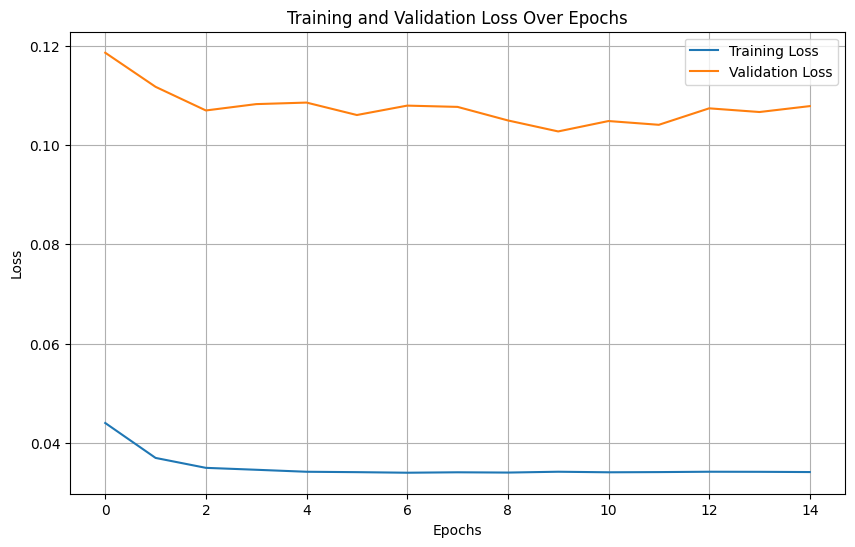

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plot Loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
import pandas as pd
df = pd.read_csv('D:/FPT/SU24/DSP391m/code/crawl/data/clean/df_combine.csv')
test_df = df.iloc[-592:]
y_test = test_df.Sell.to_list()
len(y_test)

592

In [14]:
real_pred = real_pred_array[:, :, -1]
real_predict = np.mean(real_pred, axis=1)
len(real_predict)

592

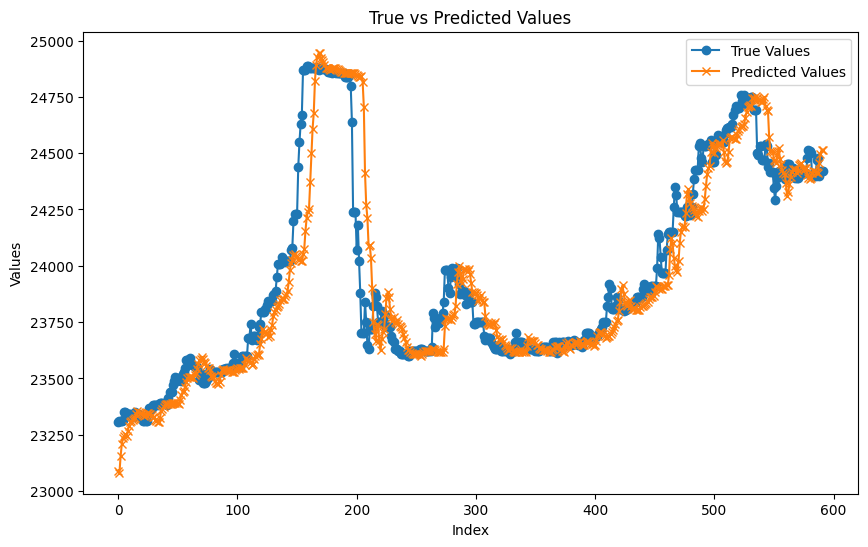

In [15]:
# Ensure y_test and pred_flattened are the same length
assert len(y_test) == len(real_predict), "Lengths of y_test and pred do not match!"

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values', marker='o')
plt.plot(real_predict.tolist(), label='Predicted Values', marker='x')
plt.title('True vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()